In [1]:
## UAS SISTEM TEMU KEMBALI INFORMASI (STKI)

## ANGGOTA  : Wira Dwi Susanto (17.01.53.0053)
##            Sativa Wahyu Priyanto (17.01.53.0052)
##            Berliana Siwi Humandari (17.01.53.0103)
## Kelas    : B1

In [2]:
pip install bs4

     |████████████████████████████████| 115 kB 12.6 MB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=84398884d48c7b638e29b475ae9b3beb474e4ccc23f19a270a7a52e949d26a6f
  Stored in directory: /home/jovyan/.cache/pip/wheels/19/f5/6d/a97dd4f22376d4472d5f4c76c7646876052ff3166b3cf71050
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

     |████████████████████████████████| 283 kB 6.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

     |████████████████████████████████| 366 kB 12.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
%matplotlib inline

import requests
from bs4 import BeautifulSoup ##LOAD LIBRARY BEAUTIFULSOUP
import urllib.parse as urlparse
from urllib.parse import parse_qs

In [6]:
action = "scraping" ## "scraping" atau "clustering"
game_id_start_scraping = 4614 ## Posisi Awal Game ID di Game Debate
game_id_end_scraping = 4914 ## Posisi Ending, Jangan terlalu banyak biar tidak lama scrapingnya
array_data_game_scraping = []

if action == "scraping":
    for game_id_start_scraping in range(int(game_id_start_scraping), int(game_id_end_scraping)+1):
        url = "https://www.game-debate.com/games/index.php?g_id=" + str(game_id_start_scraping)
        page = requests.get(url)
        #print(page.content) ##UNCOMMENT JIKA INGIN MELIHAT HASIL PRINT OUT YA
        
        parsed = urlparse.urlparse(url)
        game_id = str(parse_qs(parsed.query)['g_id'][0])
        game_id_int = int(game_id)
        #print("Game ID: " + game_id) ##UNCOMMENT JIKA INGIN MELIHAT HASIL PRINT OUT YA
        
        #GET RESOURCE HTML
        get_page = page.content
        
        #PARSE HTML DENGAN BEAUTIFULSOUP
        scraping_module = BeautifulSoup(get_page, 'html.parser')
        #print(scraping_module) ##UNCOMMENT JIKA INGIN MELIHAT HASIL PRINT OUT YA
        
        #Extract Page Title
        #game_title = scraping_module.find('div', attrs={"id":"gd-widget-div"})
        game_title = scraping_module.find('span', attrs={"itemprop":"name"})
        
        if game_title is None:
            game_title = "-"
        else:
            game_title = game_title.text
        
        game_title_replace = game_title.replace(" System Requirements ", "").strip()
        #print("Game Title: " + game_title_replace) ##UNCOMMENT JIKA INGIN MELIHAT HASIL PRINT OUT YA
        
        #Extract Game System Requirements
        game_spec_req = scraping_module.find('ul', attrs={"class":"devDefSysReqList"})
        
        if game_spec_req is None:
            game_spec_req = "-"
        else:
            game_spec_req = game_spec_req.text
        
        #print("System Requirements: \r\n" + game_spec_req) ##UNCOMMENT JIKA INGIN MELIHAT HASIL PRINT OUT YA
        
        #Extract Game Rating Based On User Review
        game_rating = scraping_module.find('span', attrs={"itemprop":"reviewRating"})
        
        if game_rating is None:
            game_rating = "0"
        else:
            game_rating = game_rating.text
            
        #print("Game Rating: " + game_rating + " / " + "10")
        #print("Game Ratingnya: " + game_rating) ##UNCOMMENT JIKA INGIN MELIHAT HASIL PRINT OUT YA
        
        #Extract Game Vote Based On User
        game_votes = scraping_module.find('div', attrs={"data-game-title":game_title_replace})
        
        if game_votes is None:
            game_votes = "0"
        else:
            game_votes = game_votes.get('data-rating-votes')
        
        #print("Total Game Votes: " + game_votes) ##UNCOMMENT JIKA INGIN MELIHAT HASIL PRINT OUT YA
        
        #Extract FPS System Benchmark Pada Game
        game_fps_bench = scraping_module.find('div', attrs={"class":"gamFpsValFigure"})
        
        if game_fps_bench is None:
            game_fps_bench = "0"
        else:
            game_fps_bench = game_fps_bench.text.strip()
        
        #print("FPS System Benchmark:\r\n" + game_fps_bench) ##UNCOMMENT JIKA INGIN MELIHAT HASIL PRINT OUT YA
        
        #Extract Game Short Desc
        game_short_desc = scraping_module.find('div', class_='game-description-container')
        
        if game_short_desc is None:
            game_short_desc = "-"
        else:
            game_short_desc = game_short_desc.text.strip()
        
        #print("Game Short Desc:\r\n" + game_short_desc) ##UNCOMMENT JIKA INGIN MELIHAT HASIL PRINT OUT YA
        
        array_data_game_scraping.append([int(game_id_int), str(game_title_replace), str(game_spec_req), float(game_rating), int(game_votes), str(game_fps_bench), str(game_short_desc)])
        
    print(array_data_game_scraping)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


[[4614, 'Cyberpunk 2077', '\nOS: Win 7 64 \nProcessor: Intel Core i5-3570K 3.4GHz / AMD FX-8310 \n\nGraphics: AMD Radeon RX 470 4GB or NVIDIA GeForce GTX 780 \nVRAM: 3GB\n\nSystem Memory: 8 GB RAM\n\n\nStorage: 70 GB Hard drive space\n\nDirectX 12 Compatible Graphics Card\n', 8.79, 1996, '70 \nFPS', 'Cyberpunk 2077 won our Best Game Of Show - E3 2019. Its certainly become one of the most anticipated titles on our gaming horizon and now has an official release date. Cyberpunk 2077 is out on 17th September 2020 for PC, PlayStation 4, and Xbox One.'], [4615, 'Aqua', '-', 0.0, 0, '0', "Aqua (also known as Aqua - Naval Warfare) is an arcade-action shooter with tactical elements, driven by a steampunk story in which the vast majority of the world is covered with water. Aqua was developed by Games Distillery on their own proprietary engine and published by Microsoft Game Studios. It was released for the Xbox 360 via Xbox Live Arcade on May 19, 2010. The game is set in an alternate reality whe

In [7]:
    ##ADD DATA TO CSV UNTUK NANTINYA DILAKUKAN CLUSTERING
    ##KITA BUTUH LIBRARY PANDAS UNTUK PROSES PENGOLAHAN DATAFRAME-NYA
    game_data = pd.DataFrame(array_data_game_scraping, columns=['game_id', 'game_title', 'system_requirements', 'game_rating', 'game_votes', 'fps_system_bench', 'game_short_desc'])
    game_data.to_csv('game_data_set_new.csv', index=False)
    print(game_data)

     game_id                                         game_title  \
0       4614                                     Cyberpunk 2077   
1       4615                                               Aqua   
2       4616                        The Expendables 2 Videogame   
3       4617                    Virtua Fighter 5 Final Showdown   
4       4618  Teenage Mutant Ninja Turtles: Turtles in Time ...   
..       ...                                                ...   
296     4910                                          RobotRiot   
297     4911    Shogun 2: Total War Saints and Heroes Unit Pack   
298     4912                                            A.R.C.S   
299     4913  Victoria II: A House Divided American Civil Wa...   
300     4914                               River Simulator 2012   

                                   system_requirements  game_rating  \
0    \nOS: Win 7 64 \nProcessor: Intel Core i5-3570...         8.79   
1                                                    

In [8]:
## PROSES CLUSTERING, AMBIL DATASET PADA CSV DAN 5 DATA TERATAS
if action == "clustering": ## JIKA ACTION DIISI DENGAN "clustering" pada coding bagian paling atas
    game_data = pd.read_csv("game_data_set_new.csv")
    print(game_data.head())

In [9]:
    ## Coba menampilkan informasi datatype pada dataset
    game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_id              301 non-null    int64  
 1   game_title           301 non-null    object 
 2   system_requirements  301 non-null    object 
 3   game_rating          301 non-null    float64
 4   game_votes           301 non-null    int64  
 5   fps_system_bench     301 non-null    object 
 6   game_short_desc      301 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [10]:
    game_data['length'] = game_data['game_title'].apply(len)
    game_data.head()

,game_id,game_title,system_requirements,game_rating,game_votes,fps_system_bench,game_short_desc,length
0,4614,Cyberpunk 2077,\nOS: Win 7 64 \nProcessor: Intel Core i5-3570...,8.79,1996,70 \nFPS,Cyberpunk 2077 won our Best Game Of Show - E3 ...,14
1,4615,Aqua,-,0.00,0,0,Aqua (also known as Aqua - Naval Warfare) is a...,4
2,4616,The Expendables 2 Videogame,\nOS: Win Xp 32 \nProcessor: Intel Celeron E12...,0.00,0,200+ \nFPS,"Well, another game has been outed but this tim...",27
3,4617,Virtua Fighter 5 Final Showdown,-,0.00,0,0,"The fifth entry in SEGA's advanced, realistic ...",31
4,4618,Teenage Mutant Ninja Turtles: Turtles in Time ...,-,0.00,0,0,Teenage Mutant Ninja Turtles: Turtles in Time ...,56


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Distribution of Length over the Texts')

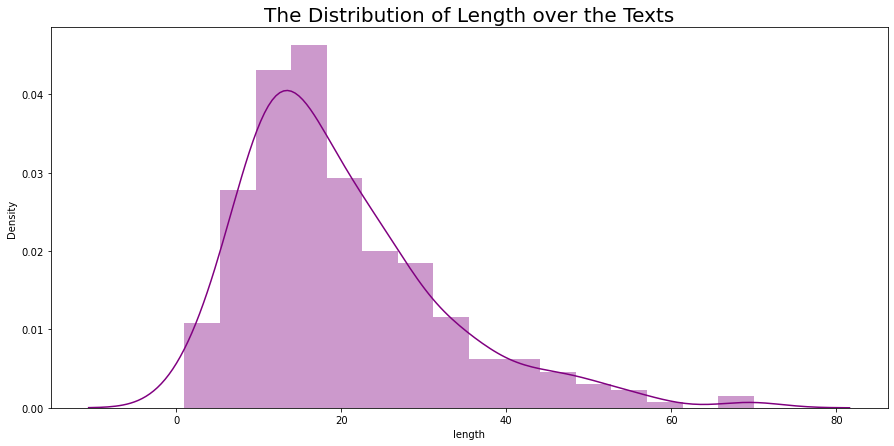

In [11]:
    plt.rcParams['figure.figsize'] = (15, 7)
    sns.distplot(game_data['length'], color = 'purple')
    plt.title('The Distribution of Length over the Texts', fontsize = 20)

Text(0.5, 1.0, 'WordCloud ')

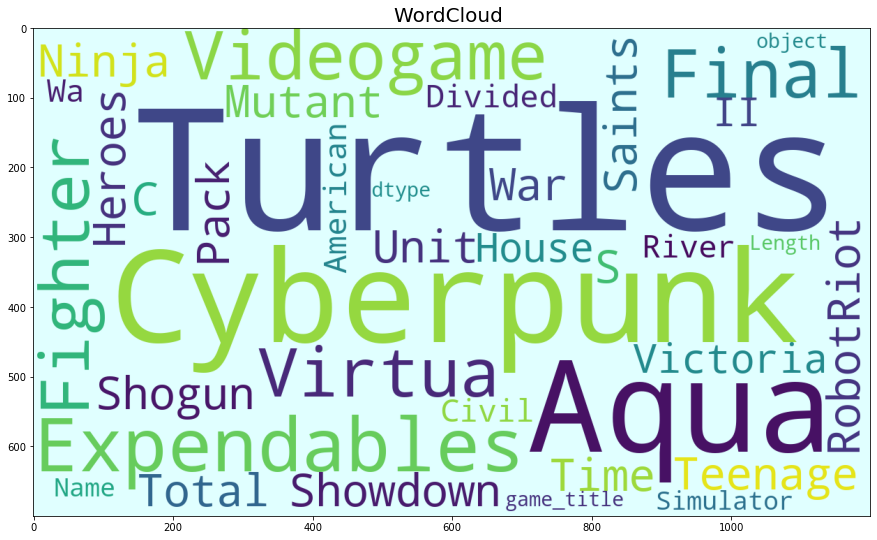

In [12]:
    ## Gunakan fungsi wordcloud untuk visualisasi pada atribut game_title
    wordcloud = WordCloud(background_color = 'lightcyan',
                          width = 1200,
                          height = 700).generate(str(game_data['game_title']))

    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.title("WordCloud ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

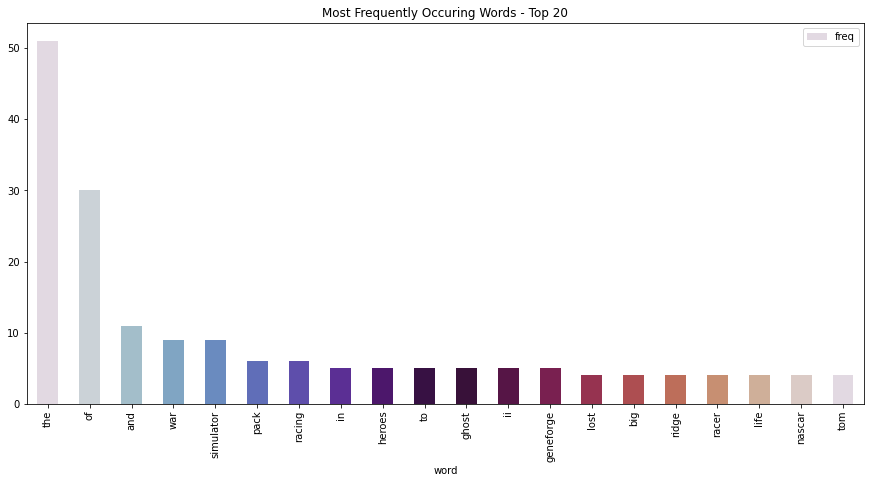

In [13]:
    ## Gunakan fungsi CountVectorizer untuk mencari word frequency
    cv = CountVectorizer()
    words = cv.fit_transform(game_data['game_title'])
    sum_words = words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

    color = plt.cm.twilight(np.linspace(0, 1, 20))
    frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
    plt.title("Most Frequently Occuring Words - Top 20")

In [14]:
    print("Shape of X :", words.shape)

Shape of X : (301, 635)


In [15]:
    ## Hapus kolom variable yang tidak diperlukan untuk proses clustering
    game_data = game_data.drop(['game_id', 'system_requirements', 'fps_system_bench'], axis = 1)
    game_data.head()

,game_title,game_rating,game_votes,game_short_desc,length
0,Cyberpunk 2077,8.79,1996,Cyberpunk 2077 won our Best Game Of Show - E3 ...,14
1,Aqua,0.00,0,Aqua (also known as Aqua - Naval Warfare) is a...,4
2,The Expendables 2 Videogame,0.00,0,"Well, another game has been outed but this tim...",27
3,Virtua Fighter 5 Final Showdown,0.00,0,"The fifth entry in SEGA's advanced, realistic ...",31
4,Teenage Mutant Ninja Turtles: Turtles in Time ...,0.00,0,Teenage Mutant Ninja Turtles: Turtles in Time ...,56


In [16]:
    ## Menentukan variabel mana yang akan dicluster
    ## Misalnya variabel yang dipilih adalah game_rating, game_votes
    game_data_x = game_data.iloc[:, 1:3]
    game_data_x.head()

,game_rating,game_votes
0,8.79,1996
1,0.00,0
2,0.00,0
3,0.00,0
4,0.00,0


<AxesSubplot:xlabel='game_rating', ylabel='game_votes'>

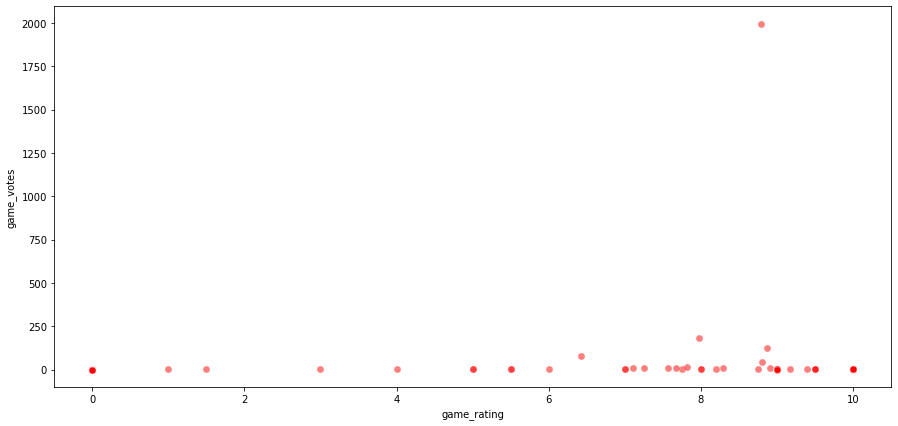

In [17]:
    ## Lihat persebaran data tersebut dengan cara berikut ini, manfaatkan fungsi Library Seaborn pada Python
    ## dari grafik di bawah ini, terlihat bahwa data kebanyakan memiliki game rating 0.0 alias belum ada review
    sns.scatterplot(x="game_rating", y="game_votes", data=game_data, s=50, color="red", alpha = 0.5)

In [18]:
    ## Ubah variabel yang sebelumnya berbentuk dataframe menjadi sebuah array
    x_array = np.array(game_data_x)
    print(x_array)

[[8.790e+00 1.996e+03]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [1.000e+01 4.000e+00]
 [1.000e+00 1.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [1.000e+01 1.000e+00]
 [0.000e+00 0.000e+00]
 [5.000e+00 1.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [9.170e+00 6.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [9.000e+00 1.000e+00]
 [1.000e+01 1.000e+00]
 [1.000e+01 1.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00]
 [1.000e+01 1.000e+00]
 [9.000e+00

In [19]:
    ## Lakukan standarisasi
    ## Terlihat bahwa hasil dari scalling data membuat data yang kita miliki berada di antara 0 – 9
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x_array)
    x_scaled

array([[8.79000000e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00400802e-03],
       [1.00000000e-01, 5.01002004e-04],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.01002004e-04],
       [0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 5.01002004e-04],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

In [20]:
    ## Tentukan jumlah clusternya, misalnya di sini ada 5 cluster
    # Gunakan fungsi library K-Means pada Python
    kmeans = KMeans(n_clusters = 5, random_state=123)
    # Menentukan kluster dari data
    kmeans.fit(x_scaled)

KMeans(n_clusters=5, random_state=123)

In [21]:
    ## Cari nilai pusat dari masing masing cluster
    print(kmeans.cluster_centers_)

[[7.57571429e-01 1.19882622e-02]
 [1.07758621e-03 1.07974570e-05]
 [9.66808511e-01 2.63292543e-03]
 [4.85714286e-01 7.87288863e-04]
 [8.79000000e-01 1.00000000e+00]]


In [22]:
    ## Tampilkan hasil clustering dan tambahkan kolom clustering ke dalam dataframe
    ## Menampilkan hasil cluster
    print(kmeans.labels_)
    
    # Menambahkan kolom "cluster" dalam dataframe game_data_set info
    game_data["cluster"] = kmeans.labels_
    game_data.head()

[4 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 3 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1
 1 1 1 1 1 2 2 2 0 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 0 1 1 1 1 1 1 1 1 3 2 1 1
 2 1 1 2 0 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 0 1 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 2 1 1 1 1 2 1 1 1 3 1 2 1 1 2 1 1 2 1 0 1
 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 2 2 3 1 1 2 0 1 1 1 1 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 3 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1
 3 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 0 1 1 1 2
 1 1 1 1 2]


,game_title,game_rating,game_votes,game_short_desc,length,cluster
0,Cyberpunk 2077,8.79,1996,Cyberpunk 2077 won our Best Game Of Show - E3 ...,14,4
1,Aqua,0.00,0,Aqua (also known as Aqua - Naval Warfare) is a...,4,1
2,The Expendables 2 Videogame,0.00,0,"Well, another game has been outed but this tim...",27,1
3,Virtua Fighter 5 Final Showdown,0.00,0,"The fifth entry in SEGA's advanced, realistic ...",31,1
4,Teenage Mutant Ninja Turtles: Turtles in Time ...,0.00,0,Teenage Mutant Ninja Turtles: Turtles in Time ...,56,1


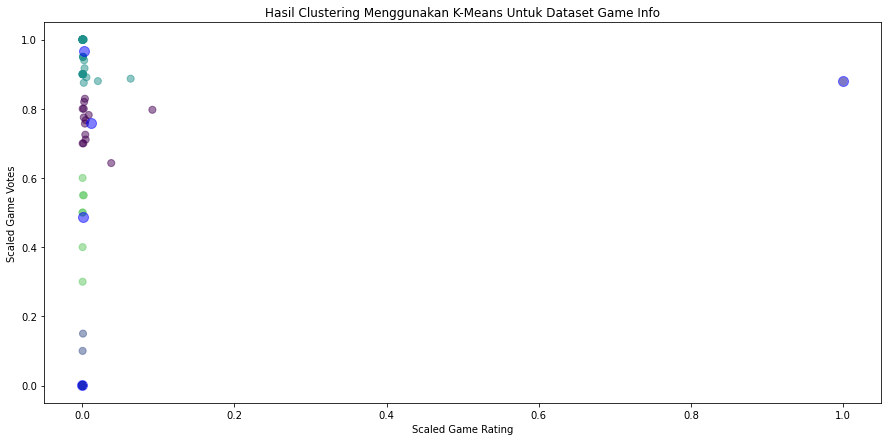

In [23]:
    ## Visualisasikan hasil clustering, kita manfaatkan fungsi library matplotlib pada Python
    ## Data Game Data Info telah berhasil di-cluster menjadi 5 cluster
    fig, ax = plt.subplots()
    sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 50,
    c = game_data.cluster, marker = "o", alpha = 0.5)
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:,1], centers[:,0], c='blue', s=100, alpha=0.5);plt.title("Hasil Clustering Menggunakan K-Means Untuk Dataset Game Info")
    plt.xlabel("Scaled Game Rating")
    plt.ylabel("Scaled Game Votes")
    plt.show()

In [24]:
    ## K-MEANS Top terms atau kata kunci per cluster
    documents = game_data['game_title'] ## AMBIL DIDASARKAN PADA GAME_TITLE

    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(documents)

    true_k = 5
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(X)

    print("Top terms atau kata kunci per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i),
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind]),
        print

    print("\n")
    print("Prediction")

    keyword1 = "top simulator game"
    Y = vectorizer.transform([keyword1])
    prediction = model.predict(Y)
    print(prediction)

    keyword2 = "freestyle game"
    Y = vectorizer.transform([keyword2])
    prediction = model.predict(Y)
    print(prediction)

    keyword3 = "racing best game"
    Y = vectorizer.transform([keyword3])
    prediction = model.predict(Y)
    print(prediction)

    keyword4 = "most anticipated game"
    Y = vectorizer.transform([keyword4])
    prediction = model.predict(Y)
    print(prediction)

    keyword5 = "ghost recon"
    Y = vectorizer.transform([keyword5])
    prediction = model.predict(Y)
    print(prediction)

Top terms atau kata kunci per cluster:
Cluster 0:
 life
 nascar
 chronicles
 fate
 dream
 knights
 truck
 sonic
 quest
 tycoon
Cluster 1:
 collectors
 edition
 fog
 dimensions
 royal
 statues
 detective
 lord
 dark
 city
Cluster 2:
 geneforge
 simulator
 war
 zero
 soccer
 aquanox
 man
 home
 pack
 recon
Cluster 3:
 online
 mu
 duty
 bounty
 bay
 fist
 fog
 fool
 fishdom
 football
Cluster 4:
 vs
 atv
 mx
 alive
 untamed
 unleashed
 avatar
 holy
 maidens
 dead


Prediction
[2]
[2]
[2]
[2]
[2]
